# Read ASCII File

Import libaries before using them

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # import matplotlib.pyplot 

An example of a function reading an ascii file. 

In [4]:
import numpy as np
def read_ascii_file(filename,index):
    "This reads an ascii file of omni data"
    with open(filename) as f:
        year = []
        day = []
        hour = []
        minute = []   
        data = []
        for line in f:
            tmp = line.split()
            year.append(int(tmp[0]))
            day.append(int(tmp[1]))
            hour.append(int(tmp[2]))
            minute.append(int(tmp[3]))
            data.append(int(tmp[index]))  
    
    data = np.array(data)
    year = np.array(year)
    day = np.array(day)
    hour = np.array(hour)
    minute = np.array(minute)
    
    return year, day, hour, minute, data

We can execute it by calling it from another function or directly from the python prompt. In the following code, the function is called to read "omni_min_case_2013.lst" that includes the symh index from March 16-18, 2013. 

In [6]:
file = '../data/omni_min_case_2013.lst'
index = -1
year, day, hour, minute, data = read_ascii_file(file,index)
print(year)
print(day)
print(hour)
print(data)

[2013 2013 2013 ... 2013 2013 2013]
[75 75 75 ... 77 77 77]
[ 0  0  0 ... 23 23 23]
[ -7  -7  -7 ... -49 -49 -49]


The datetime module supplies classes for manipulating dates and times (https://docs.python.org/3/library/datetime.html). We can creat a datetime.datetime object to contain the year, day of month, month, hour, minute, etc. 

In [5]:
import datetime as dt
def read_ascii_file(file,index): 
    "This reads an ascii file of omni data"
    with open(file) as f:
        data_dic = {"time":[],
                    "year":[],
                   "day":[],
                    "hour":[],
                   "minute":[],
                   "symh":[]}
        for line in f:
            tmp = line.split()

            # create datetime in each line
            time0 = dt.datetime(int(tmp[0]),1,1,int(tmp[2]),int(tmp[3]),0)\
                          + dt.timedelta(days=int(tmp[1])-1)     
            data_dic["time"].append(time0)
            data_dic["year"].append(int(tmp[0]))
            data_dic["day"].append(int(tmp[1]))
            data_dic["hour"].append(int(tmp[2]))
            data_dic["minute"].append(int(tmp[3]))
            data_dic["symh"].append(int(tmp[4]))
    return data_dic

Now call the new function that outputs a datetime object.

In [7]:
file = '../data/omni_min_case_2013.lst'
index = -1
data = read_ascii_file(file,index)
#print(data['time'])

matplotlib.pyplot is a collection of functions that make matplotlib work like MATLAB (https://matplotlib.org/stable/tutorials/introductory/pyplot.html). matplotlib.pyplot.plot plots y versus x as lines and/or markers (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot). We can make a simple plot of symh as a function of time.

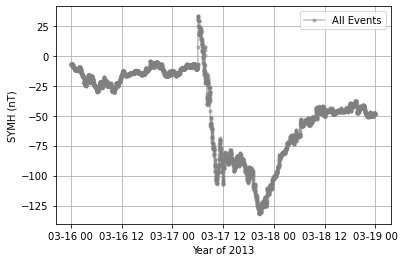

In [8]:
time = data["time"]
data1 = data["symh"]

fig,ax = plt.subplots()

ax.plot(time,data1,marker='.',c='gray',
        label='All Events',alpha=0.5)

ax.set_xlabel('Year of 2013')
ax.set_ylabel('SYMH (nT)')
ax.grid(True)
ax.legend()
plt.show() # if use ipython

In practice, we may need to select elements or indices by conditions from numpy array. In the following code, we select the time and data with symh < -100 nT, and overplot them on the curve of all symh events. 

[False False False ... False False False]


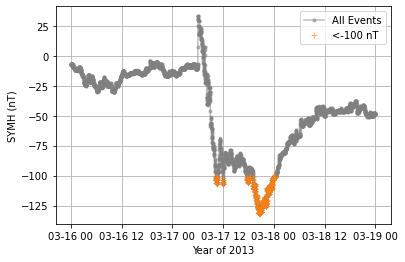

In [9]:
time = np.array(data["time"])
data1 = np.array(data["symh"])

fig,ax = plt.subplots()

ax.plot(time,data1,marker='.',c='gray',
        label='All Events',alpha=0.5)

# apply < operator on array, then lp is a bool numpy array 
lp = data1 <-100
print(lp)
# pass lp to subscript operator [] 
# it returns a new array containing elements in the position of True in lp
ax.plot(time[lp],data1[lp],marker='+',
        linestyle='',
        c= 'tab:orange',
        label='<-100 nT',
        alpha=0.6)
ax.set_xlabel('Year of 2013')
ax.set_ylabel('SYMH (nT)')
ax.grid(True)
ax.legend()

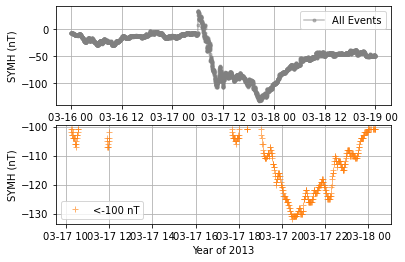

In [13]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1)
ax1.plot(time,data1,marker='.',c='gray',
        label='All Events',alpha=0.5)
ax1.set_ylabel('SYMH (nT)')
ax1.grid(True)
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
# apply < operator on array, then lp is a bool numpy array 
lp = data1 <-100

# pass lp to subscript operator [] 
# it returns a new array containing elements in the position of True in lp
ax2.plot(time[lp],data1[lp],marker='+',
        linestyle='',
        c= 'tab:orange',
        label='<-100 nT',
        alpha=0.6)
ax2.set_xlabel('Year of 2013')
ax2.set_ylabel('SYMH (nT)')
ax2.grid(True)
ax2.legend()